In [1]:
#Accurate rankings as of October 12th, 2021

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

In [3]:
album_rankings = pd.read_csv("rym_top_5000_all_time.csv")
album_rankings.shape

(5000, 9)

In [4]:
album_rankings['Release Date'] = pd.to_datetime(album_rankings['Release Date'], infer_datetime_format=True, format='mixed')

/tmp/ipykernel_934/2198543422.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  album_rankings['Release Date'] = pd.to_datetime(album_rankings['Release Date'], infer_datetime_format=True, format='mixed')


In [5]:
album_rankings['Year'] =album_rankings['Release Date'].dt.year

In [6]:
album_rankings.sort_values(by='Release Date')

,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews,Year
3782,3783.0,Billie Holiday,Billie Holiday,1947-06-01,"Vocal Jazz, Traditional Pop","sentimental, female vocals, melodic, melanchol...",3.73,371,2,1947
3202,3203.0,Masterpieces by Ellington,Duke Ellington and His Orchestra,1951-01-01,Big Band,"acoustic, female vocals, melodic, mellow, roma...",3.74,944,22,1951
844,845.0,Tristan und Isolde,Wilhelm Furtwängler / Ludwig Suthaus / Kirsten...,1952-11-10,"Opera, Romanticism","opera, epic, female vocals, romantic, male voc...",3.88,521,7,1952
4037,4038.0,Thelonious,Thelonious Monk Trio,1953-01-01,Hard Bop,"quirky, rhythmic, raw, complex, acoustic, tech...",3.71,909,13,1953
1417,1418.0,Ellington Uptown,Duke Ellington and His Orchestra,1953-02-01,Big Band,"acoustic, instrumental, dense, technical, urba...",3.83,"1,425",25,1953
...,...,...,...,...,...,...,...,...,...,...
4367,4368.0,DELTARUNE Chapter 2,Toby Fox,2021-09-17,"Video Game Music, Sequencer & Tracker","instrumental, playful, quirky, melodic, eclect...",3.71,356,4,2021
1066,1067.0,A Beginner's Mind,Sufjan Stevens & Angelo De Augustine,2021-09-24,Indie Folk,"male vocals, ethereal, soft, concept album, me...",3.84,"3,654",26,2021
3374,3375.0,Delta Estácio blues,Juçara Marçal,2021-09-30,"Vanguarda paulista, Experimental Rock","female vocals, rhythmic, avant-garde, uncommon...",3.74,524,2,2021
3835,3836.0,Oxidized,Frontierer,2021-10-01,Mathcore,"noisy, heavy, chaotic, rhythmic, dissonant, co...",3.69,961,18,2021


In [7]:
def separate_by_decade(df):
    # Ensure 'Year' column is treated as integers
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
    
    # Create a new column 'Decade' to store the decade information
    df['Decade'] = (df['Year'] // 10) * 10

    # Group by decade and aggregate the years into lists
    result = df.groupby('Decade')['Year'].agg(list).reset_index()

    return result

In [8]:


result_df = separate_by_decade(album_rankings)

# Print the result DataFrame
print(result_df)

   Decade                                               Year
0    1940                                             [1947]
1    1950  [1959, 1959, 1958, 1959, 1959, 1958, 1959, 195...
2    1960  [1969, 1969, 1967, 1966, 1963, 1965, 1966, 196...
3    1970  [1975, 1973, 1972, 1970, 1974, 1972, 1979, 197...
4    1980  [1980, 1989, 1986, 1989, 1985, 1980, 1988, 198...
5    1990  [1997, 1991, 1994, 1998, 1993, 1991, 1996, 199...
6    2000  [2000, 2004, 2007, 2000, 2001, 2001, 2005, 200...
7    2010  [2015, 2012, 2010, 2016, 2012, 2016, 2016, 201...
8    2020  [2021, 2021, 2021, 2020, 2020, 2021, 2020, 202...


In [9]:
def add_decade_column(df):
    # Ensure 'Year' column is treated as integers
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').fillna(0).astype(int)
    
    # Create a new column 'Decade' to store the decade information
    df['Decade'] = (df['Year'] // 10) * 10

    return df

In [10]:
album_rankings


,Ranking,Album,Artist Name,Release Date,Genres,Descriptors,Average Rating,Number of Ratings,Number of Reviews,Year,Decade
0,1.0,OK Computer,Radiohead,1997-06-16,"Alternative Rock, Art Rock","melancholic, anxious, futuristic, alienation, ...",4.23,"70,382",1531,1997,1990
1,2.0,Wish You Were Here,Pink Floyd,1975-09-12,"Progressive Rock, Art Rock","melancholic, atmospheric, progressive, male vo...",4.29,"48,662",983,1975,1970
2,3.0,In the Court of the Crimson King,King Crimson,1969-10-10,"Progressive Rock, Art Rock","fantasy, epic, progressive, philosophical, com...",4.30,"44,943",870,1969,1960
3,4.0,Kid A,Radiohead,2000-10-03,"Art Rock, Experimental Rock, Electronic","cold, melancholic, futuristic, atmospheric, an...",4.21,"58,590",734,2000,2000
4,5.0,To Pimp a Butterfly,Kendrick Lamar,2015-03-15,"Conscious Hip Hop, West Coast Hip Hop, Jazz Rap","political, conscious, poetic, protest, concept...",4.27,"44,206",379,2015,2010
...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,Gracious!,Gracious,1970-07-17,"Progressive Rock, Symphonic Prog",NaN,3.69,565,32,1970,1970
4996,4997.0,Knights of the Cross,Grave Digger,1998-05-18,"Power Metal, Heavy Metal","history, male vocals, heavy, concept album, an...",3.67,562,11,1998,1990
4997,4998.0,(Listen For) The Rag and Bone Man,And Also the Trees,2007-11-12,Art Rock,"atmospheric, poetic, dark, male vocals, ominou...",3.68,524,15,2007,2000
4998,4999.0,Hymnen für elektronische und konkrete Klänge,Studio für elektronische Musik des Westdeutsch...,1969-01-01,"Musique concrète, Modern Classical, Electronic","avant-garde, sampling, dense, complex, scary, ...",3.65,536,11,1969,1960


In [11]:
average_ratings_by_decade = album_rankings.groupby('Decade')['Average Rating'].mean().reset_index()

# Print or use the result as needed
print(average_ratings_by_decade)

   Decade  Average Rating
0    1940        3.730000
1    1950        3.795500
2    1960        3.801755
3    1970        3.784188
4    1980        3.765276
5    1990        3.768880
6    2000        3.751769
7    2010        3.745602
8    2020        3.730196


In [12]:
# Group by 'Decade' and calculate the count of values for each decade
count_by_decade = album_rankings.groupby('Decade')['Average Rating'].size().reset_index(name='Count')

print(count_by_decade)

   Decade  Count
0    1940      1
1    1950    120
2    1960    564
3    1970   1232
4    1980    688
5    1990   1080
6    2000    882
7    2010    382
8    2020     51


In [13]:
# Group by 'Year' and calculate the average rating for each individual year
average_ratings_by_year = album_rankings.groupby('Year')['Average Rating'].mean().reset_index()

# Print or use the result as needed
print(average_ratings_by_year)

    Year  Average Rating
0   1947        3.730000
1   1951        3.740000
2   1952        3.880000
3   1953        3.770000
4   1954        3.770000
..   ...             ...
67  2017        3.737955
68  2018        3.750556
69  2019        3.742692
70  2020        3.713226
71  2021        3.756500

[72 rows x 2 columns]


In [14]:
# Group by 'Year' and calculate the count of values for each individual year
count_by_year = album_rankings.groupby('Year')['Average Rating'].size().reset_index(name='Count')

# Print or use the result as needed
print(count_by_year)

    Year  Count
0   1947      1
1   1951      1
2   1952      1
3   1953      2
4   1954      6
..   ...    ...
67  2017     44
68  2018     36
69  2019     26
70  2020     31
71  2021     20

[72 rows x 2 columns]


In [15]:
average_ratings_by_year['Average Rating']

0     3.730000
1     3.740000
2     3.880000
3     3.770000
4     3.770000
        ...   
67    3.737955
68    3.750556
69    3.742692
70    3.713226
71    3.756500
Name: Average Rating, Length: 72, dtype: float64

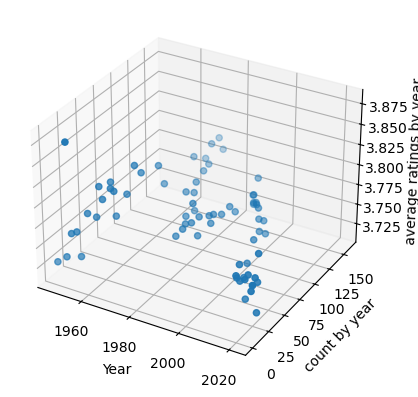

In [16]:
# Load data from CSV file
data = pd.read_csv('rym_top_5000_all_time.csv')

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Extract data from the DataFrame
years = count_by_year['Year']
counts = count_by_year['Count']
ratings = average_ratings_by_year['Average Rating']

# Scatter plot for each year
ax.scatter(years, counts, ratings, marker='o')

ax.set_xlabel('Year')
ax.set_ylabel('count by year')
ax.set_zlabel('average ratings by year')

plt.show()

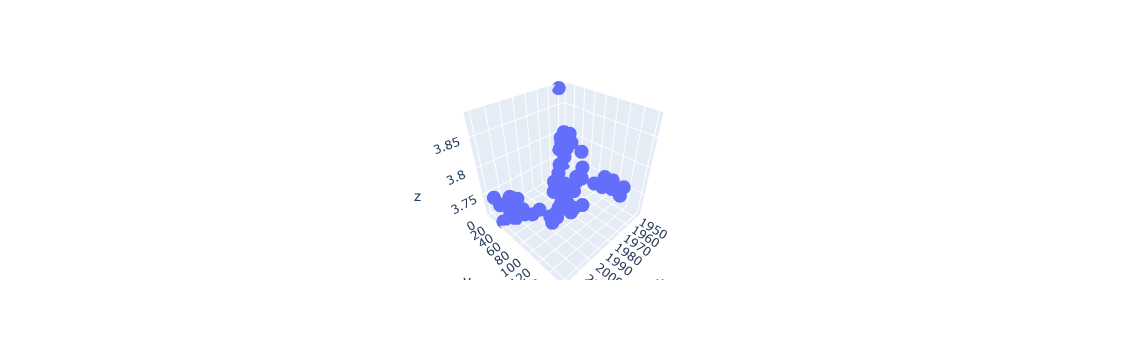

In [26]:


# Load data from CSV file
data = pd.read_csv('rym_top_5000_all_time.csv')

# Extract data from the DataFrame
years = count_by_year['Year']
counts = count_by_year['Count']
ratings = average_ratings_by_year['Average Rating']

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(data, x=years, y=counts, z=ratings, labels={'Year': 'Year', 'Count': 'Count by Year', 'Average Rating': 'Average Ratings by Year'})

ax.set_xlabel('Year')
ax.set_ylabel('count by year')
ax.set_zlabel('average ratings by year')

# Show the plot
fig.show()